In [1]:
# import necessary python modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
# load raw data to pands data frame
df = pd.read_csv('../data/togo-dapaong_qc.csv')

In [3]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


#### Summary statistics and Missing values report

- The data contains numerical and categorical(cleaning) data points
- The comment column must be dropped since most of it is NaN
- GHI contains negative value, which is not valid. since irradiation can't be negative
- From the quartile I can observe some columns are skewed

In [4]:
# identify a column with a lot of NaN values
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

#### Outlier detection and Basic cleaning

- drop comments column
- set negative values in GHI to 0.
- check the presence of outliers using boxplot 
- remove outlier rows using z-score value

In [5]:
df = df.drop('Comments', axis=1)
neg_val_cols = ['GHI'] # set all negative values of these cols to 0.
df[neg_val_cols] = df[neg_val_cols].clip(lower=0)
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,231.718786,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330
std,321.691953,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277
min,0.000000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000


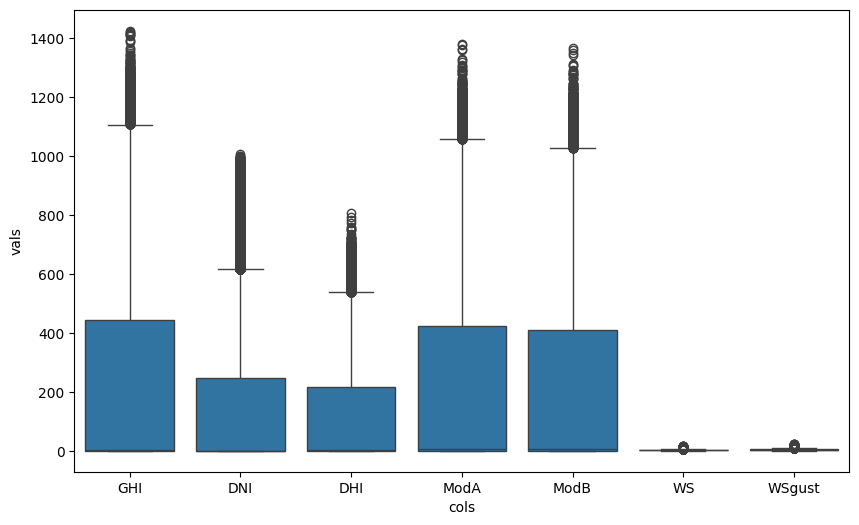

In [6]:
# columns with potential outlier values
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_melted = pd.melt(df[outlier_cols], var_name='cols', value_name='vals')
plt.figure(figsize=(10, 6))
sns.boxplot(x='cols', y='vals', data=df_melted)
plt.show()


In [7]:
# flag rows that has any value of |z-score| > 3
df_zscore = df[outlier_cols].apply(zscore)
mask = (df_zscore.abs() > 3).any(axis=1)
df_cleaned = df[~mask]
df_cleaned.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000,516343.000000
mean,225.028731,147.968936,112.777219,219.370346,213.017809,27.727469,55.182568,2.312167,3.154226,0.548047,162.128683,10.491454,975.893898,0.000529,0.000952,32.312159,33.378324
std,316.449213,247.676535,151.567919,311.841697,302.612339,4.757363,28.698396,1.377994,1.762189,0.252824,92.028994,5.915066,2.147359,0.022988,0.018621,10.957057,12.718410
min,0.000000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,24.200000,26.800000,1.400000,1.900000,0.400000,74.700000,6.800000,975.000000,0.000000,0.000000,23.800000,23.600000
50%,0.500000,0.000000,1.500000,2.800000,2.800000,27.200000,59.400000,2.200000,2.900000,0.500000,200.200000,10.700000,976.000000,0.000000,0.000000,28.200000,28.200000
75%,423.200000,237.900000,211.600000,404.100000,393.050000,31.000000,81.000000,3.200000,4.100000,0.700000,233.700000,14.000000,977.000000,0.000000,0.000000,40.300000,42.600000
max,1196.000000,904.100000,586.000000,1171.200000,1143.000000,41.400000,99.800000,6.700000,8.800000,2.700000,360.000000,86.900000,983.000000,1.000000,1.800000,70.400000,94.600000


 #### After removing the outliers data size dropped by 1.8%

In [8]:
# save the cleaned data in csv format
df_cleaned.to_csv('../data/togo-clean.csv')